In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001093672"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001093672
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,PEOPLES BANCORP OF NORTH CAROLINA INC
Ticker,PEBK


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,62.0,1.606613e+01,2.628355e+00,11.45,1.398250e+01,1.551500e+01,1.811250e+01,21.31
interest income,63.0,1.122292e+07,1.974729e+06,8609681.00,9.581834e+06,1.072600e+07,1.229300e+07,15624745.00
net income,59.0,1.782384e+06,9.227354e+05,-439000.00,1.195458e+06,1.777000e+06,2.475500e+06,3667000.00
net interest income,63.0,8.363702e+06,1.257237e+06,5416429.00,7.875898e+06,8.479000e+06,8.707126e+06,11426000.00
provision for loan losses,62.0,3.280730e+06,3.757199e+06,-672000.00,6.615000e+05,1.306500e+06,4.336750e+06,11248000.00


# Plots

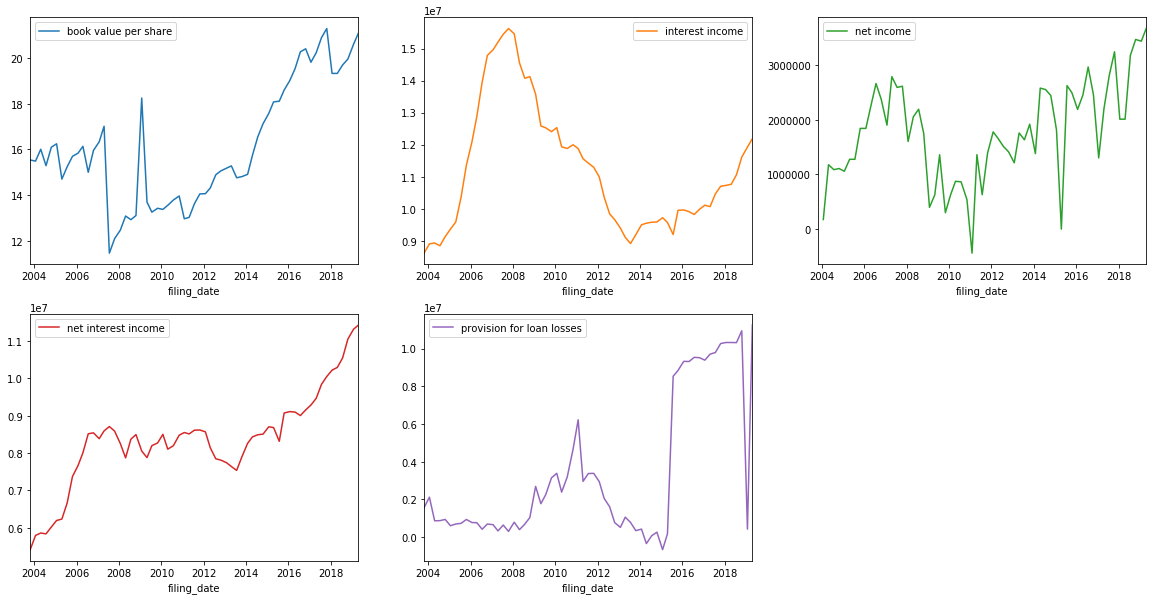

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type             message
cik        item                                                          
0001093672 book value per share       2018Q1  missing      Missing period
           net income                 2003Q3  missing      Missing period
           net income                 2005Q2  missing      Missing period
           net income                 2005Q4  missing      Missing period
           net income                 2018Q1  missing      Missing period
           provision for loan losses  2018Q1  missing      Missing period
           total revenue                None    empty  No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()